## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

from watermark import watermark
print(watermark())
print(watermark(iversions=True, globals_=globals()))

Last updated: 2022-10-15T09:43:07.159084-07:00

Python implementation: CPython
Python version       : 3.7.13
IPython version      : 7.31.1

Compiler    : Clang 12.0.0 
OS          : Darwin
Release     : 21.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas: 1.3.5



## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(Path('./Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [3]:
### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [4]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
bitstamp.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106
2018-03-31 23:58:00,6927.65,6929.42,6927.65,$6927.65,0.839507,5817.007705,6929.080007
2018-03-31 23:59:00,6929.98,6929.98,6928.00,$6928.01,0.209363,1450.735763,6929.289993


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase =  pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
display(coinbase.head())
coinbase.tail()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
display(bitstamp.count())
display(bitstamp.isnull().sum())

Open              129067
High              129067
Low               129067
Close             129540
BTC Volume        129067
USD Volume        129067
Weighted Price    129067
dtype: int64

Open              473
High              473
Low               473
Close               0
BTC Volume        473
USD Volume        473
Weighted Price    473
dtype: int64

In [8]:
bitstamp = bitstamp.dropna()
display(bitstamp.count())

Open              129067
High              129067
Low               129067
Close             129067
BTC Volume        129067
USD Volume        129067
Weighted Price    129067
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [9]:
# Use the str.replace function to remove the dollar sign, $
bitstamp['Close'] = bitstamp['Close'].str.replace("$", " ")
bitstamp.head()

/Users/evieair/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bitstamp['Close'] = bitstamp['Close'].astype(float)

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [12]:
# Repeat Steps 1–4 for the coinbase DataFrame
display(coinbase.count())
display(coinbase.isnull().sum())

Open              129322
High              129322
Low               129322
Close             129540
BTC Volume        129322
USD Volume        129322
Weighted Price    129322
dtype: int64

Open              218
High              218
Low               218
Close               0
BTC Volume        218
USD Volume        218
Weighted Price    218
dtype: int64

In [13]:
coinbase = coinbase.dropna()
display(coinbase.count())

Open              129322
High              129322
Low               129322
Close             129322
BTC Volume        129322
USD Volume        129322
Weighted Price    129322
dtype: int64

In [14]:
coinbase["Close"] = coinbase["Close"].str.replace("$", " ")
coinbase.head()

/Users/evieair/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [15]:
coinbase['Close'] = coinbase['Close'].astype(float)

In [16]:
coinbase.duplicated().sum()

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [17]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp[['Close']].loc['2018-01-01':'2018-03-31']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [18]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced =  coinbase[['Close']].loc['2018-01-01':'2018-03-31']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [19]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp[["Close"]].describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [20]:
# Generate the summary statistics for the coinbase DataFrame
coinbase[["Close"]].describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices Jan-Mar 2018'}, xlabel='Timestamp'>

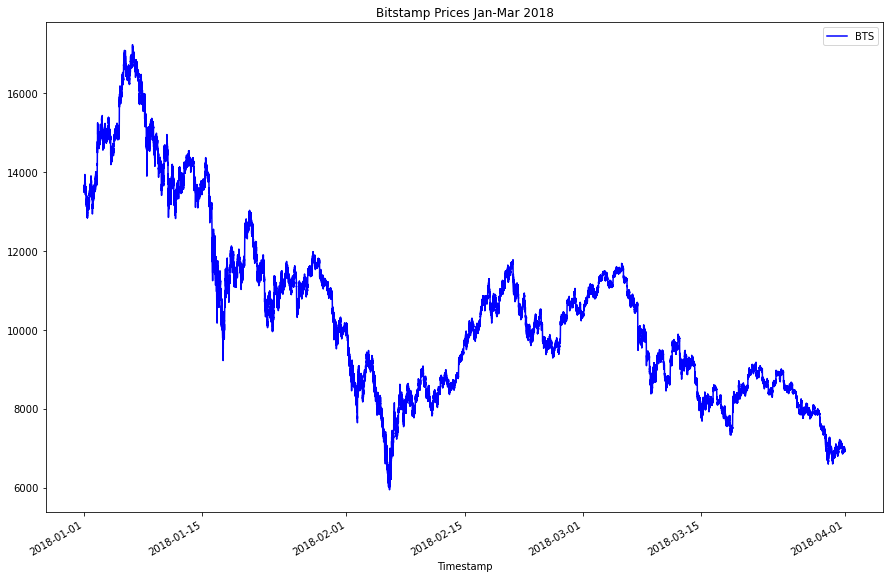

In [21]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp Prices Jan-Mar 2018", color="blue", label="BTS")

<AxesSubplot:title={'center':'Coinbase Prices Jan-Mar 2018'}, xlabel='Timestamp'>

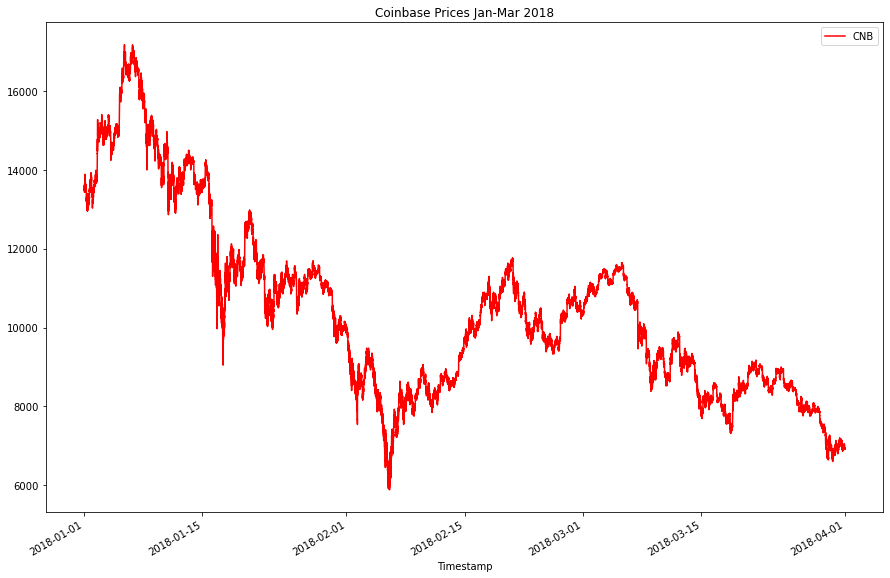

In [22]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase['Close'].plot(legend=True, figsize=(15, 10), title="Coinbase Prices Jan-Mar 2018", color="red", label="CNB")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Jan-Mar 2018'}, xlabel='Timestamp'>

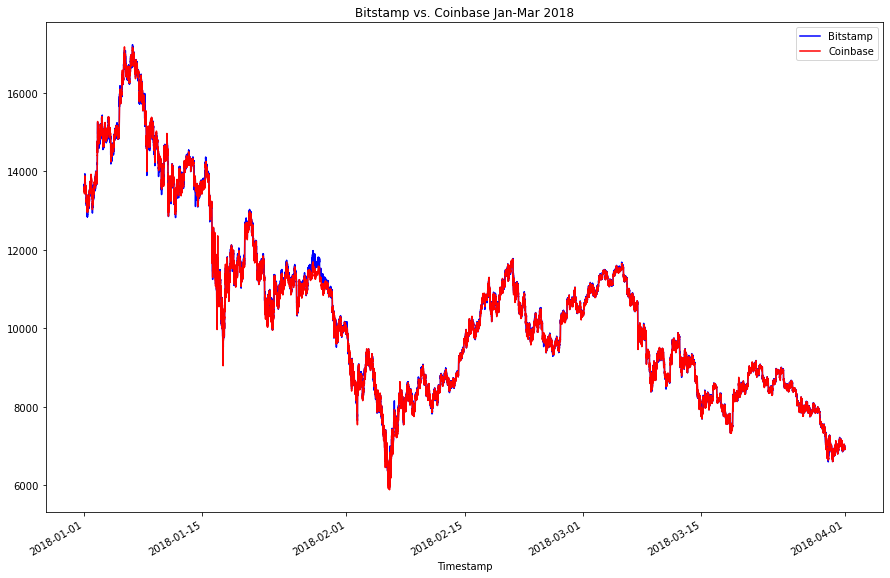

In [23]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase Jan-Mar 2018", color="blue", label="Bitstamp")
coinbase['Close'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Jan 2018'}, xlabel='Timestamp'>

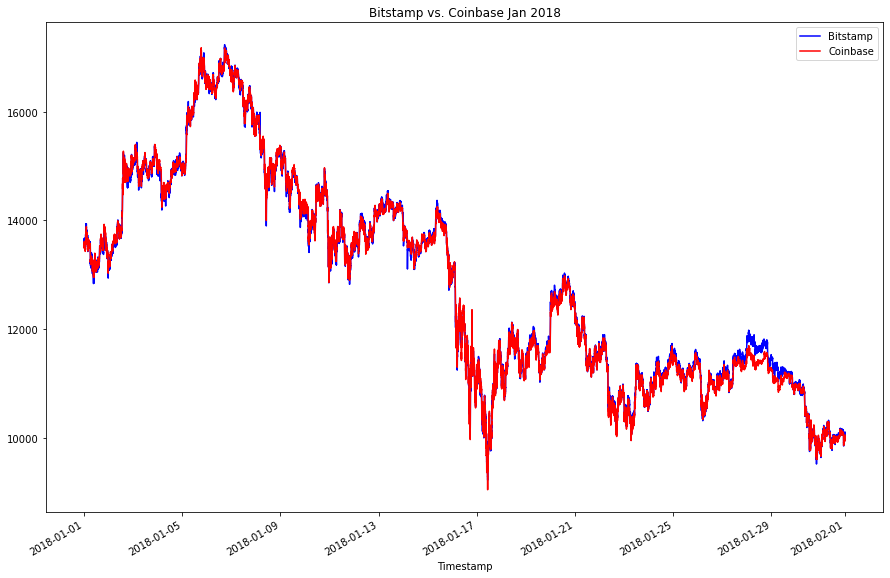

In [24]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase Jan 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase")

<AxesSubplot:title={'center':'Bitstamp vs. Coinbase Mar 2018'}, xlabel='Timestamp'>

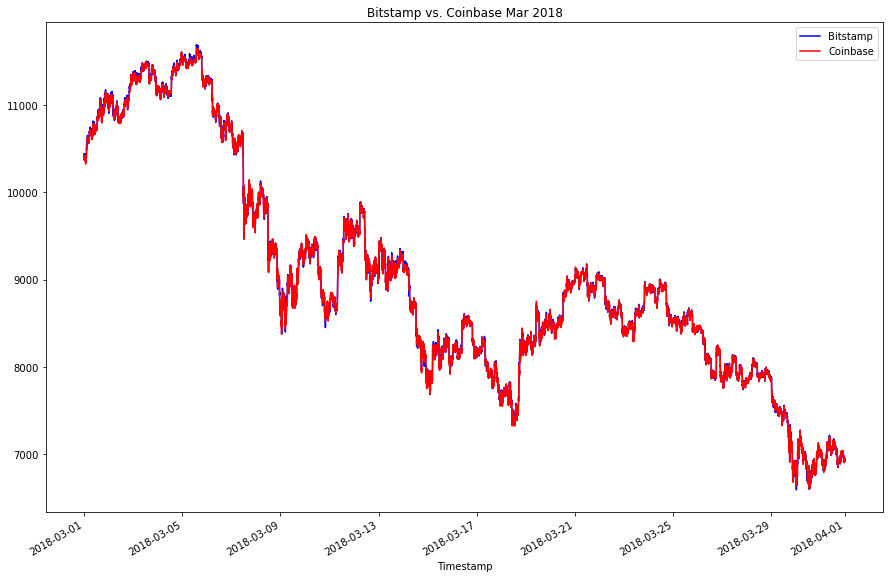

In [25]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 10), title="Bitstamp vs. Coinbase Mar 2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** yes, I would say it decreased.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Bitstamp v. Coinbase 10Jan2018'}, xlabel='Timestamp'>

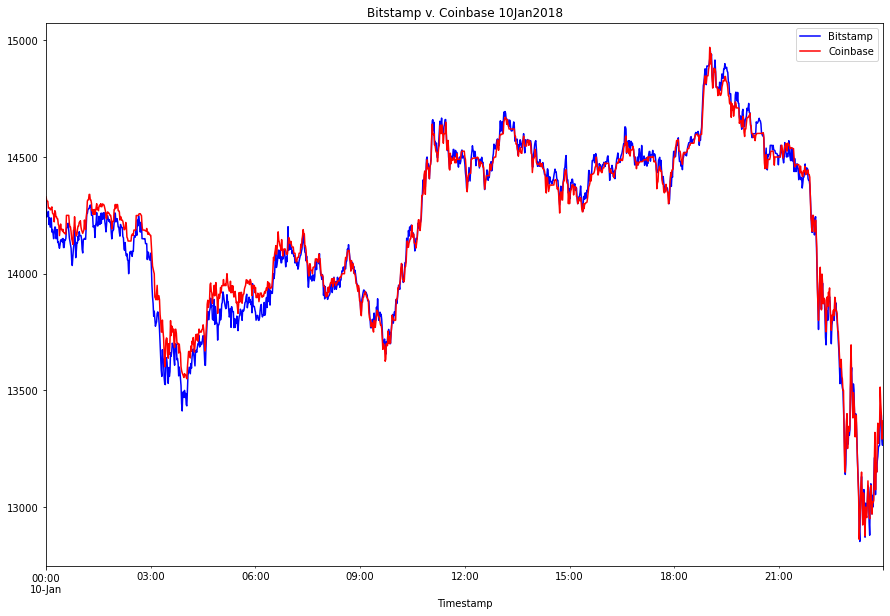

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-10'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase 10Jan2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-01-10'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase")

In [30]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase['Close'].loc['2018-01-10'] - bitstamp['Close'].loc['2018-01-10']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread Early Date'}>

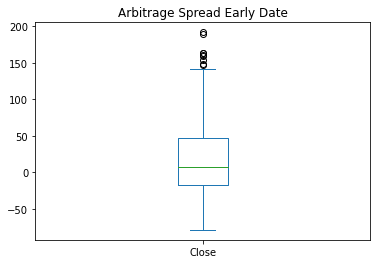

In [31]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box',title="Arbitrage Spread Early Date")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase 16Jan2018'}, xlabel='Timestamp'>

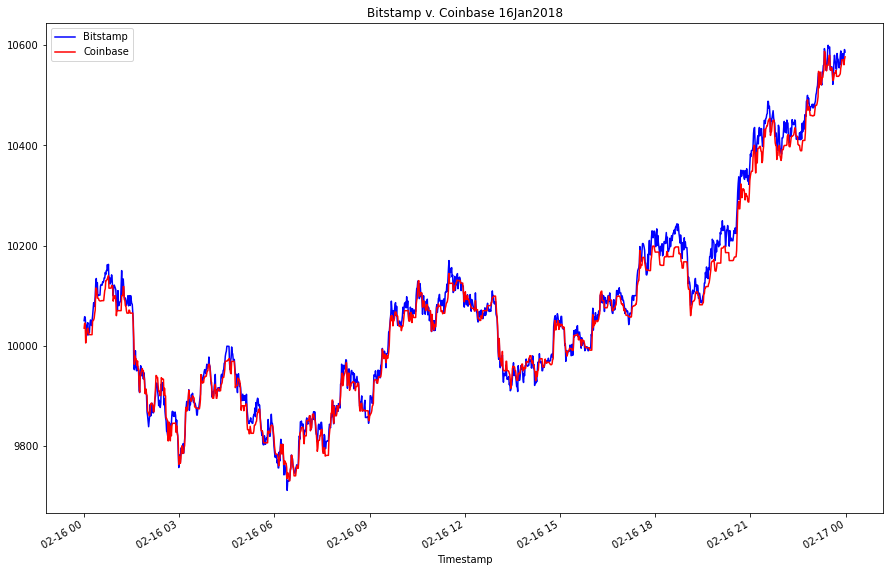

In [32]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-16'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase 16Jan2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-02-16'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase")

In [34]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-16'] - coinbase['Close'].loc['2018-02-16']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1438.00000
mean       10.82217
std        16.94882
min       -56.00000
25%        -1.11000
50%        10.07500
75%        21.47250
max        65.05000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread Middle Date'}>

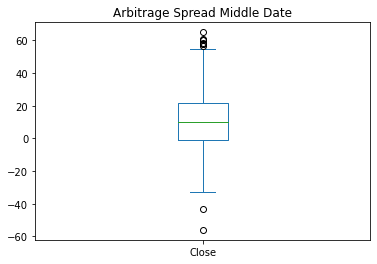

In [35]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box',title="Arbitrage Spread Middle Date")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase 22Mar2018'}, xlabel='Timestamp'>

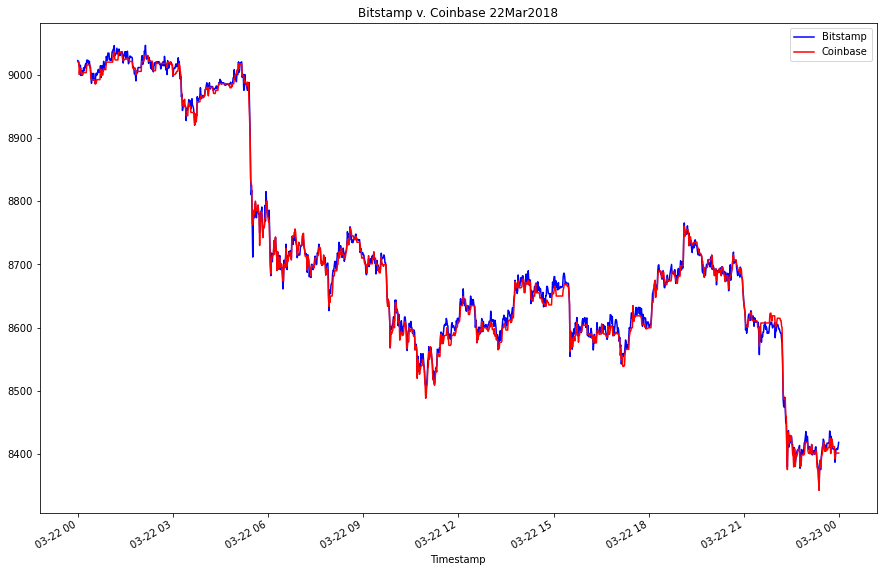

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-22'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase 22Mar2018", color="blue", label="Bitstamp")
coinbase['Close'].loc['2018-03-22'].plot(legend=True, figsize=(15, 10), color="red", label="Coinbase")

In [36]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-22'] - coinbase['Close'].loc['2018-03-22']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1428.000000
mean        3.386289
std         8.562611
min       -50.810000
25%        -1.705000
50%         3.465000
75%         9.200000
max        29.980000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread Late Date'}>

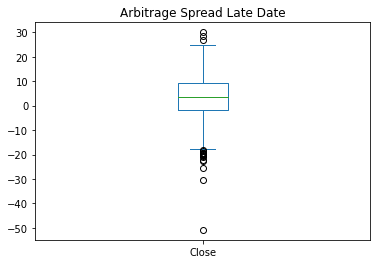

In [37]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box',title="Arbitrage Spread Late Date")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [38]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase['Close'].loc['2018-01-10'] - bitstamp['Close'].loc['2018-01-10']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()

count    1440.000000
mean       15.978826
std        45.869721
min       -78.810000
25%       -17.787500
50%         6.880000
75%        46.530000
max       192.000000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [39]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2018-01-10']

# Review the spread return DataFrame
spread_return_early

Timestamp
2018-01-10 00:00:00    0.001297
2018-01-10 00:01:00    0.005037
2018-01-10 00:02:00    0.003852
2018-01-10 00:03:00    0.004211
2018-01-10 00:04:00    0.001005
                         ...   
2018-01-10 23:55:00    0.005223
2018-01-10 23:56:00    0.000381
2018-01-10 23:57:00    0.000491
2018-01-10 23:58:00    0.002252
2018-01-10 23:59:00    0.004694
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [40]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
profitable_trades_early.head()

Timestamp
2018-01-10 02:22:00    0.010001
2018-01-10 03:04:00    0.010719
2018-01-10 03:05:00    0.013895
2018-01-10 03:06:00    0.011597
2018-01-10 03:17:00    0.011663
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [41]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    14.000000
mean      0.011375
std       0.001300
min       0.010001
25%       0.010540
50%       0.010963
75%       0.011913
max       0.014012
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [42]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-10']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2018-01-10 02:22:00    140.01
2018-01-10 03:04:00    148.70
2018-01-10 03:05:00    192.00
2018-01-10 03:06:00    160.49
2018-01-10 03:17:00    159.10
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [43]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

count     14.000000
mean     155.471429
std       17.641360
min      137.130000
25%      141.095000
50%      151.490000
75%      162.372500
max      192.000000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

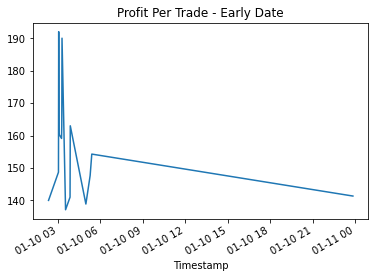

In [44]:
# Plot the results for the early profit per trade DataFrame
profit_per_trade_early.plot(title='Profit Per Trade - Early Date')

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [45]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum = profit_per_trade_early.sum()
profit_sum

2176.600000000002

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [46]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()


<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

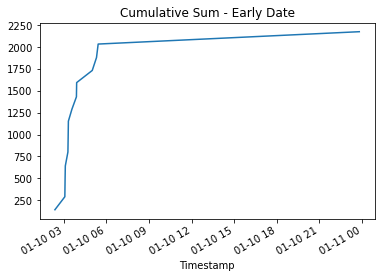

In [47]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(title='Cumulative Sum - Early Date')

Middle Date Arbitrage Calculations

In [48]:
# For the middle date of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-16'] - coinbase['Close'].loc['2018-02-16']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle.describe()

count    1438.00000
mean       10.82217
std        16.94882
min       -56.00000
25%        -1.11000
50%        10.07500
75%        21.47250
max        65.05000
Name: Close, dtype: float64

In [49]:
# For the date middle of the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / coinbase['Close'].loc['2018-02-16']

# Review the spread return DataFrame
spread_return_middle

Timestamp
2018-02-16 00:00:00    0.001495
2018-02-16 00:01:00    0.001299
2018-02-16 00:02:00    0.001208
2018-02-16 00:03:00    0.003759
2018-02-16 00:04:00         NaN
                         ...   
2018-02-16 23:55:00    0.001185
2018-02-16 23:56:00    0.000083
2018-02-16 23:57:00    0.001794
2018-02-16 23:58:00    0.001847
2018-02-16 23:59:00    0.000879
Name: Close, Length: 1440, dtype: float64

In [50]:
# For the date middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [51]:
# For the date middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [52]:
# For the date middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * coinbase['Close'].loc['2018-02-16']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle.head()

Series([], Name: Close, dtype: float64)

In [53]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Middle Date'}, xlabel='Timestamp'>

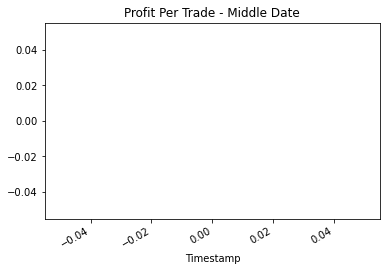

In [54]:
# Plot the results for the middle profit per trade DataFrame
profit_per_trade_middle.plot(title='Profit Per Trade - Middle Date')

In [55]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum = profit_per_trade_middle.sum()
profit_sum

0.0

In [56]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

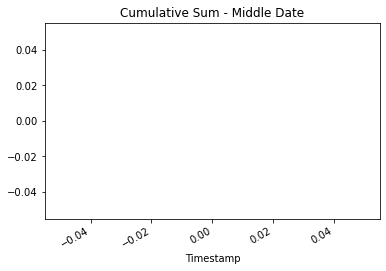

In [57]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(title='Cumulative Sum - Middle Date')

Late Date Arbitrage calculations

In [58]:
# For the late date in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-22'] - coinbase['Close'].loc['2018-03-22']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late.describe()

count    1428.000000
mean        3.386289
std         8.562611
min       -50.810000
25%        -1.705000
50%         3.465000
75%         9.200000
max        29.980000
Name: Close, dtype: float64

In [59]:
# For the late date in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / coinbase['Close'].loc['2018-03-22']

# Review the spread return DataFrame
spread_return_late

Timestamp
2018-03-22 00:00:00    0.000220
2018-03-22 00:01:00    0.000156
2018-03-22 00:02:00         NaN
2018-03-22 00:03:00    0.001446
2018-03-22 00:04:00    0.000117
                         ...   
2018-03-22 23:55:00    0.000762
2018-03-22 23:56:00    0.000890
2018-03-22 23:57:00    0.000680
2018-03-22 23:58:00    0.001194
2018-03-22 23:59:00    0.002000
Name: Close, Length: 1438, dtype: float64

In [60]:
# For the late date in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

In [61]:
# For the late date in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [62]:
# For the late date in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * coinbase['Close'].loc['2018-03-22']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the late profit DataFrame
profit_per_trade_late.head()

Series([], Name: Close, dtype: float64)

In [63]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit Per Trade - Late Date'}, xlabel='Timestamp'>

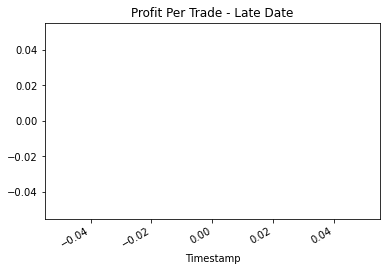

In [64]:
# Plot the results for the late profit per trade DataFrame
profit_per_trade_late.plot(title='Profit Per Trade - Late Date')

In [65]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum = profit_per_trade_late.sum()
profit_sum

0.0

In [66]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()

<AxesSubplot:title={'center':'Cumulative Sum - Late Date'}, xlabel='Timestamp'>

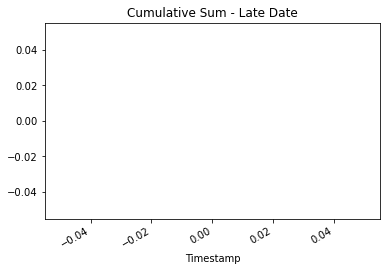

In [67]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(title='Cumulative Sum - Late Date')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** There were only profits at the beginning of the 3 month data set. By the middle of the data set to the end there were no profits to be made between the two exchanges. The exchanges normalized reducing the profit opportunities using arbitrage.

Analysis Report:
    In 2018 Bitcoin and Coinbase had really gained ground with the masses internationally. They were still highly volitile and dicrepancies
    between world-wide exchanges made opportunities for those keeping close tabs on them. However, by early 2018 more traders began to see 
    the arbitrage opportunities, and act on them, thus bringing the price difference between the two exhanges to less than made it profitable to quick buy/sell.
    This can be seen in the Pofit-Per-Trade in Jan2018.

<AxesSubplot:title={'center':'Profit Per Trade - Early Date'}, xlabel='Timestamp'>

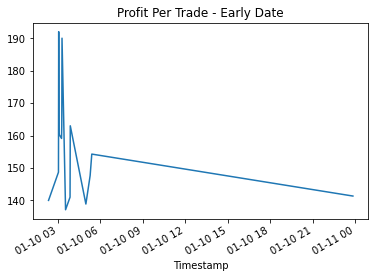

In [68]:
profit_per_trade_early.plot(title='Profit Per Trade - Early Date')

Within a month, the profitablity (spread return) dipped below 1% as seen in the followind data from Feb2018

In [69]:
spread_return_middle

Timestamp
2018-02-16 00:00:00    0.001495
2018-02-16 00:01:00    0.001299
2018-02-16 00:02:00    0.001208
2018-02-16 00:03:00    0.003759
2018-02-16 00:04:00         NaN
                         ...   
2018-02-16 23:55:00    0.001185
2018-02-16 23:56:00    0.000083
2018-02-16 23:57:00    0.001794
2018-02-16 23:58:00    0.001847
2018-02-16 23:59:00    0.000879
Name: Close, Length: 1440, dtype: float64

In [ ]:
Thus, no longer making it profitable to buy and sell Bitstamp and Coinbase for arbitrage oppotunities.